<h1><center> “Фреймворк PyTorch для разработки искусственных нейронных сетей”</center></h1>

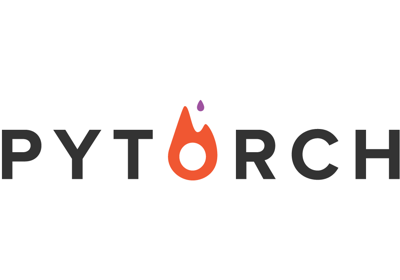

### План курса:
* Первое занятие: Введение в PyTorch. Мы познакомимся с самим фреймворком, установим его, посмотрим минимальный набор функций для получения какого-либо результата
* Второе занятие: CNN and LSTM for human action recognition. Мы рассмотрим предложенные архитектуры, поработаем с различными данными и напишем свой собственный даталоадер
* На третьем занятии мы поговорим о Generative adversarial networks: 
* Четвертое занятие: Сегментация изображений
* Пятое занятие: Детектирование лиц и распознавание эмоций


<h1><center>PyTorch: водное занятие</center></h1>

### План занятия:
* Tensorflow vs PyTorch
* Установка
* Основы работы с тензорами
* Градиент
* Загрузки датасета 
* Обучения модели
* Сохранение
* Пара слов о CUDA и GPU 

###  Tensorflow vs PyTorch:

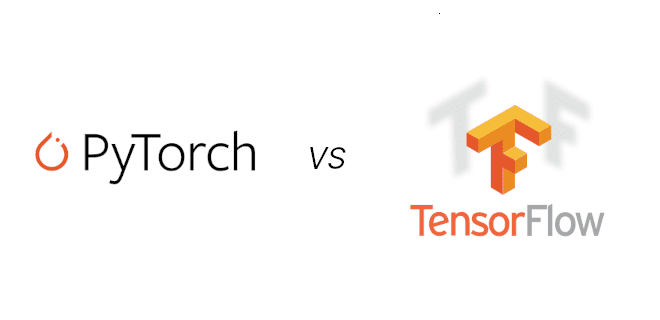

* GPU и TPU
* Отладка
* Определение графа - верно для старых версий, в Октябре 2019 года добавили поддержку подобного стиля программирования 

#### Различия:
https://towardsdatascience.com/pytorch-vs-tensorflow-in-2020-fe237862fae1
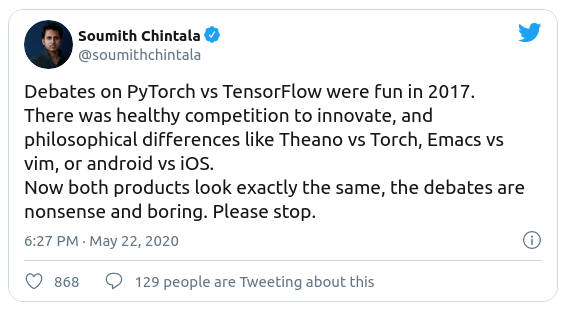

### Вычислительный граф:

Вычислительный граф — это иллюстрированная запись какой-либо функции, состоящая из вершин и рёбер. Вершины (или узлы) — вычислительные операции, которые необходимо выполнить, а рёбра связывают их в определённую последовательность.

Ниже представлен простой пример вычислительного графа для вычисления выражения a = (b + c) * (c + 2). Можно разбить вычисление на следующие шаги:

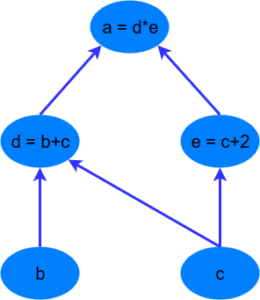

Преимущества использования вычислительного графа в том, что каждый узел является независимым функционирующим куском кода, если получит все необходимые входные данные. Это позволяет  оптимизировать производительность при выполнении расчетов, используя многоканальную обработку, параллельные вычисления.

### Важные источники

У пайторча очень хорошая официальная документация:
* https://pytorch.org/tutorials/

* https://discuss.pytorch.org/

* https://stackoverflow.com/ :)

### Установка

### https://pytorch.org/

torch - основная библиотека, в которой хранится описание слоев, моделей, оптимизаторов и т.д.  
[torchvision](https://pytorch.org/vision/stable/index.html) - в основном computer vision


In [1]:
!pip3 install torch torchvision

     |████████████████████████████████| 776.8 MB 30 kB/s s eta 0:00:01
     |████████████████████████████████| 12.8 MB 11.7 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 11.1 MB/s eta 0:00:01
     |████████████████████████████████| 15.3 MB 10.0 MB/s eta 0:00:01


In [1]:
pip show torch

Name: torch
Version: 1.7.1
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /home/bob/anaconda3/envs/geekbrains/lib/python3.7/site-packages
Requires: numpy, typing-extensions
Required-by: torchvision
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip show torchvision

Name: torchvision
Version: 0.8.2
Summary: image and video datasets and models for torch deep learning
Home-page: https://github.com/pytorch/vision
Author: PyTorch Core Team
Author-email: soumith@pytorch.org
License: BSD
Location: /home/bob/anaconda3/envs/geekbrains/lib/python3.7/site-packages
Requires: numpy, pillow, torch
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [3]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Sat_Aug_25_21:08:01_CDT_2018
Cuda compilation tools, release 10.0, V10.0.130


### Подключение 

In [3]:
import torch
import torchvision

# Тензоры

Тензор - основная структура данных в библиотеках машинног обучения, которая похожа на массив Numpy. Что-то вроде n-мерной матрицы или массива массивов.Тензоры обеспечивают ускорение различных математических операций. Эти операции при выполнении в большом количестве в глубоком обучении имеют огромное значение в скорости.

PyTorch тензоры могут определяться несколькими способами:

In [5]:
x = torch.Tensor(2, 3)

Этот код создает тензор размера (2,3), заполненый разным шумом. В данном примере первое число — количество рядов, второе — количество столбцов:

In [6]:
x

tensor([[ 1.4013e-45,  0.0000e+00, -1.0277e+17],
        [ 3.0702e-41,  3.9236e-44,  0.0000e+00]])

Мы также можем создать тензор, заполненный случайными float-значениями:

In [8]:
x = torch.rand(2, 3)
x

tensor([[0.3129, 0.3290, 0.1015],
        [0.4342, 0.6505, 0.5721]])

Умножение тензоров, сложение друг с другом и другие алгебраические операции просты:

In [11]:
x = torch.ones(2,3)
y = torch.ones(2,3) * 2
x + y

tensor([[3., 3., 3.],
        [3., 3., 3.]])

In [12]:
y

tensor([[2., 2., 2.],
        [2., 2., 2.]])

Также доступна работа с функцией slice в numpy. Например y[:,1]:

In [10]:
y[:,1] = y[:,1] + 1
y

tensor([[2., 3., 2.],
        [2., 3., 2.]])

### Некоторые основы и пару слов о  numpy

In [13]:
import numpy as np

Pytorch позволяет делать многие вещи так же, как и numpy. Это означает, что вы можете получить значение тензора в любой момент времени. Но так же, обратите внимание на некоторые отличия. Полная таблица расхождений расположена здесь: 
* https://github.com/torch/torch7/wiki/Torch-for-Numpy-users

In [14]:
x = np.arange(9).reshape(3, 3)

print("X :\n%s\n" % x)
print("X размеры : %s\n" % (x.shape,))
print("X тип : %s\n" % (type(x)))
print("Добавим 10 :\n%s\n" % (x + 10))
print("Среднее по строчке :\n%s\n" % (x.mean(axis=-1)))
print("Среднее по столбцу :\n%s\n" % (x.mean(axis=0)))

X :
[[0 1 2]
 [3 4 5]
 [6 7 8]]

X размеры : (3, 3)

X тип : <class 'numpy.ndarray'>

Добавим 10 :
[[10 11 12]
 [13 14 15]
 [16 17 18]]

Среднее по строчке :
[1. 4. 7.]

Среднее по столбцу :
[3. 4. 5.]



##### PyTorch поддерживает разные типы тензоров:

* HalfTensor: 16-bit float
* FloatTensor: 32-bit float (torch.Tensor)
* DoubleTensor: 64-bit float

* ShortTensor: 16-bit int
* IntTensor: 32-bit int
* LongTensor: 64-bit int



#####  Весь список:
* https://pytorch.org/docs/stable/tensors.html

##### Функция для вывода данных о тензоре:

In [20]:
def print_tens_info(tensor):
    print("X :\n%s\n" % tensor)
    print("X количество измерений:\n%s\n" % tensor.dim())
    print("X размеры : ",  tensor.size())
    print("X тип : %s\n" % (tensor.type()))
    print("Добавим 10 :\n%s\n" % (tensor + 10))
#     print("Среднее по строчке :\n%s\n" % (tensor.mean(axis=-1)))
#     print("Среднее по столбцу :\n%s\n" % (tensor.mean(axis=0)))
    

In [21]:
y = np.arange(9).reshape(3, 3).astype(float)
x = torch.tensor(y)  
# x = torch.DoubleTensor(3, 3, 3)
# x = torch.DoubleTensor([[1.0, 2.0],[2.0,3.0]])  

In [22]:
print_tens_info(x)

X :
tensor([[0., 1., 2.],
        [3., 4., 5.],
        [6., 7., 8.]], dtype=torch.float64)

X количество измерений:
2

X размеры :  torch.Size([3, 3])
X тип : torch.DoubleTensor

Добавим 10 :
tensor([[10., 11., 12.],
        [13., 14., 15.],
        [16., 17., 18.]], dtype=torch.float64)



In [23]:
x = torch.arange(9).view(3,3) 
# x = torch.arange(0,9).view(3,3).type(torch.float32)
# y = np.arange(9).reshape(3, 3).astype(float)

In [24]:
print_tens_info(x)

X :
tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

X количество измерений:
2

X размеры :  torch.Size([3, 3])
X тип : torch.LongTensor

Добавим 10 :
tensor([[10, 11, 12],
        [13, 14, 15],
        [16, 17, 18]])



#####  Из numpy в tensor и обратно

In [25]:
x = x.numpy()
print("X :\n%s\n" % x)
print("X размеры : %s\n" % (x.shape,))
print("X тип : %s\n" % (type(x)))
# print("Добавим 10 :\n%s\n" % (x + 10))
# print("Среднее по строчке :\n%s\n" % (x.mean(axis=-1)))
# print("Среднее по столбцу :\n%s\n" % (x.mean(axis=0)))

X :
[[0 1 2]
 [3 4 5]
 [6 7 8]]

X размеры : (3, 3)

X тип : <class 'numpy.ndarray'>



In [26]:
x = torch.randn(3, 3)
print_tens_info(x)

X :
tensor([[ 0.7000,  1.6620, -1.1740],
        [-0.0343, -0.7295,  0.3370],
        [ 1.2630, -0.9785,  0.7316]])

X количество измерений:
2

X размеры :  torch.Size([3, 3])
X тип : torch.FloatTensor

Добавим 10 :
tensor([[10.7000, 11.6620,  8.8260],
        [ 9.9657,  9.2705, 10.3370],
        [11.2630,  9.0215, 10.7316]])



#####  Некоторые отличия:

* ```x.astype('int64') -> x.type(torch.LongTensor)```
* ``` np.concatenate ->	torch.cat ```
* ``` np.multiply ->	torch.cmul ```
* ``` np.copy(x) ->	x:clone() ```


### Градиент и автоматическое дифференцирование в PyTorch

В библиотеках глубокого обучения есть механизмы вычисления градиента ошибки и обратного распространения ошибки через вычислительный граф. Этот механизм, называется autograd в PyTorch, легко доступен и интуитивно понятен. Variable — главный компонент автоградиентной системы в PyTorch. Variable обертывает тензор и позволяет автоматически вычислять градиент на тензоре при вызове функции .backward(). Объект содержит данные из тензора и градиент тензора.

In [29]:
from torch.autograd import Variable

Создадим пустой тензор:

In [30]:
torch.ones(3)

tensor([1., 1., 1.])

И создадим Variable из нашего простого тензора:

In [32]:
x = Variable(torch.ones(3), requires_grad = True)

#### requires_grad 
Флаг, что необходимо автоматически вычислять градиент на тензоре при вызове функции .backward(). Если стоит False - градиент не нужен, обучение не происходит. 
Пример:

In [33]:
print_tens_info(x)

X :
tensor([1., 1., 1.], requires_grad=True)

X количество измерений:
1

X размеры :  torch.Size([3])
X тип : torch.FloatTensor

Добавим 10 :
tensor([11., 11., 11.], grad_fn=<AddBackward0>)



В Variable у нас хранится информация о градиенте. Мы можем получить ее через метод grad:

In [34]:
print(x.grad)

None


В данном случае ничего нет, т.к. мы никаких действий с нашим тензором не производили.

Создадим переменную на основе x:

In [19]:
z = (x * x) + 5.0 * x #задание - посчитать производную ручками

In [20]:
print_tens_info(z)

X :
tensor([6., 6., 6.], grad_fn=<AddBackward0>)

X количество измерений:
1

X размеры :  torch.Size([3])
X тип : torch.FloatTensor



Мы вызываем метод backward и передаем ей единичный тензор:

In [21]:
z.backward(torch.ones(3))

И тогда, когда мы выполнили эту функцию - мы вызываем градиент и мы получаем три 7ки:

In [22]:
print(x.grad)

tensor([7., 7., 7.])


#### Подключаемые модули

Поговорим теперь о слоях, которые мы можем использовать. 

In [23]:
from torch import nn 
from torch import optim

* nn - формирование вычислительных графов для слоев нейронных сетей. TensorFlow: Keras.
* optim - алгоритмы оптимизации (SGD, Adam и т.д.). TensorFlow: модуль optimizers.
* Dataset – представление входных и выходных данных в разных форматах: TensorDataset, IterableDataset)
* DataLoader преобразует Dataset в формат, с помощью которого можно контролировать размера пакета (batch size), перемешивать данные, распределять процессы и т.д. В TensorFlow за это отвечает модуль data.

### Линейное преобразование

In [24]:
linear = nn.Linear(2, 2)

In [25]:
print ('w: ', linear.weight)
print ('b: ', linear.bias)

w:  Parameter containing:
tensor([[-0.4772, -0.4287],
        [-0.0383, -0.2576]], requires_grad=True)
b:  Parameter containing:
tensor([-0.0546,  0.1970], requires_grad=True)


Функция потерь:

In [26]:
criterion = nn.MSELoss()

И для метода оптимизации мы используем градиентный стохастический спуск. Мы должны передавать в функцию параметры нашей модели:

In [27]:
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

In [28]:
x = Variable(torch.randn(2), requires_grad = True)
y = Variable(torch.randn(2), requires_grad = False)

Прежде чем передать наши данные в модель, мы должны обнулить градиент нашего оптимайзера с помощью zero_grad. это нужно делать перед каждой передачей наших данных модели.
И мы высчитываем нашу ошибку, используя предсказанные данные и наши лейблы с помощью функций потерь:

In [29]:
optimizer.zero_grad()
pred = linear(x)
loss = criterion(pred, y)
print('loss: ', loss.item())

loss:  0.3003738522529602


In [30]:
print ('dL/dw: ', linear.weight.grad) 
print ('dL/db: ', linear.bias.grad)

dL/dw:  None
dL/db:  None


тут высчитываем градиенты:

In [31]:
loss.backward()

In [32]:
print ('dL/dw: ', linear.weight.grad) 
print ('dL/db: ', linear.bias.grad)

dL/dw:  tensor([[-0.2884,  0.1187],
        [ 0.1939, -0.0798]])
dL/db:  tensor([ 0.6432, -0.4325])


In [33]:
print ('w: ', linear.weight)
print ('b: ', linear.bias)

w:  Parameter containing:
tensor([[-0.4772, -0.4287],
        [-0.0383, -0.2576]], requires_grad=True)
b:  Parameter containing:
tensor([-0.0546,  0.1970], requires_grad=True)


А тут обновляем параметры нашего градиента с помощью шага оптимизации:

In [79]:
optimizer.step()

In [80]:
print ('w: ', linear.weight)
print ('b: ', linear.bias)

w:  Parameter containing:
tensor([[-0.4743, -0.4299],
        [-0.0403, -0.2568]], requires_grad=True)
b:  Parameter containing:
tensor([-0.0610,  0.2014], requires_grad=True)


#### Загрузка существующего датасета:

Теперь посмотрим как все это работает с помощью реального датасета:

In [37]:
import torchvision.transforms as transforms
import matplotlib.pyplot as plt ### воспользуемся для отображения изображения

Будем рассматривать датасет CIFAR10, который представлен в библиотеке torchvision. 

In [39]:
train_dataset = torchvision.datasets.CIFAR10(root='../../data/', # путь куда будут скачиваться наши данные(если download=true), 
                                                                 # или где лежат наши данные(dowload=False)
                                             train=True, # говорим что используем датасет для обучения  
                                             transform=transforms.ToTensor(), # важная строчка: здесь мы преобразуем данные
                                                                                # из датасета в формат тензоров из торч
                                             download=False)


image, label = train_dataset[0]
print (image.size())
print (label)

100.0%

Extracting ../../data/cifar-10-python.tar.gz to ../../data/
torch.Size([3, 32, 32])
6


Что бы вывести, наше изображение, нам нужно воспользоваться функцией permute и поменять размерности:

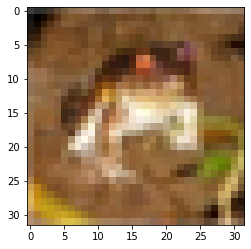

In [40]:
plt.imshow(image.permute(1, 2, 0).numpy())

Теперь скачав датасет, нам нужно его как-то оформить для загрузки в нашу модель. Делается это с помощью DataLoader:

In [41]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, 
                                           shuffle=True)

In [42]:
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=False, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=4,
                                         shuffle=False)

100.0%

Extracting ./data/cifar-10-python.tar.gz to ./data


In [44]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Определим следующую модель:

In [1]:
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        pred = self.fc3(x)
        return pred


net = Net().to('cuda')

NameError: name 'nn' is not defined

In [ ]:
net

In [46]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [47]:
for epoch in range(10):  # 10 эпох 
    running_loss = 0.0 # Для вывода процесса обучения
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0], data[1]

        # Обнуляем градиент
        optimizer.zero_grad()
    
        # Делаем предсказание
        outputs = net(inputs)
        # Рассчитываем лосс-функцию
        loss = criterion(outputs, labels)
        # Делаем шаг назад по лоссу
        loss.backward()
        # Делаем шаг нашего оптимайзера
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Training is finished!')

[1,     1] loss: 0.001
[1,   301] loss: 0.346
[1,   601] loss: 0.345
[2,     1] loss: 0.001
[2,   301] loss: 0.344
[2,   601] loss: 0.342
[3,     1] loss: 0.001
[3,   301] loss: 0.328
[3,   601] loss: 0.311
[4,     1] loss: 0.001
[4,   301] loss: 0.300
[4,   601] loss: 0.297
[5,     1] loss: 0.001
[5,   301] loss: 0.288
[5,   601] loss: 0.283
[6,     1] loss: 0.001
[6,   301] loss: 0.269
[6,   601] loss: 0.261
[7,     1] loss: 0.001
[7,   301] loss: 0.250
[7,   601] loss: 0.246
[8,     1] loss: 0.001
[8,   301] loss: 0.238
[8,   601] loss: 0.235
[9,     1] loss: 0.001
[9,   301] loss: 0.230
[9,   601] loss: 0.229
[10,     1] loss: 0.001
[10,   301] loss: 0.223
[10,   601] loss: 0.221
Training is finished!


#### Сохранение модели

In [48]:
PATH = './cifar_net_version_test_intro.pth'
torch.save(net.state_dict(), PATH)

In [53]:
print("Model state_dict: ")
for param in net.state_dict():
    print(param," \ ", net.state_dict()[param].size())

Model state_dict: 
conv1.weight  \  torch.Size([6, 3, 5, 5])
conv1.bias  \  torch.Size([6])
conv2.weight  \  torch.Size([16, 6, 5, 5])
conv2.bias  \  torch.Size([16])
fc1.weight  \  torch.Size([120, 400])
fc1.bias  \  torch.Size([120])
fc2.weight  \  torch.Size([84, 120])
fc2.bias  \  torch.Size([84])
fc3.weight  \  torch.Size([10, 84])
fc3.bias  \  torch.Size([10])


#### Загрузка и использование модели 

In [49]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [50]:
data_iter = iter(test_loader)
images, labels = data_iter.next()

GroundTruth:    cat  ship  ship plane


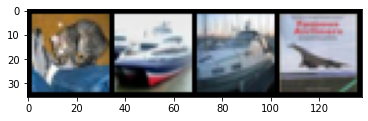

In [51]:
outputs = net(images)
imgs = torchvision.utils.make_grid(images)
plt.imshow(imgs.permute(1, 2, 0).numpy())
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [52]:
print(outputs)

tensor([[-1.0717, -0.8821,  0.8315,  2.3269, -0.0758,  1.6416,  1.4881, -1.2619,
         -0.3864, -0.8331],
        [ 2.5627,  3.3864, -0.2522, -1.8455, -0.8475, -2.4879, -3.1473, -2.1598,
          3.5758,  3.1994],
        [ 1.5160,  3.9697, -0.8273, -0.9691, -2.4016, -1.2325, -3.1449, -2.2126,
          2.5325,  3.7609],
        [ 1.5756,  2.9213,  0.1516, -0.7080, -1.0564, -1.4666, -2.9534, -0.8423,
          2.7535,  1.6228]], grad_fn=<AddmmBackward>)


In [53]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship   car   car


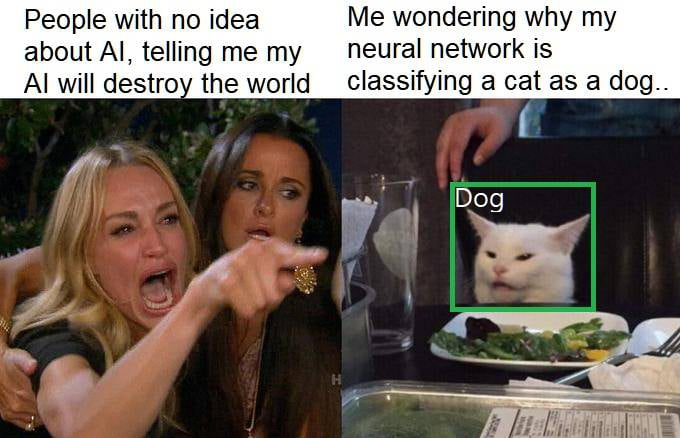

#### Подключение GPU 

In [54]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [55]:
torch.randn(10, 10, device=device)

tensor([[ 0.6681, -0.8234, -0.9728, -0.9994, -0.3187, -0.3505, -1.4918,  0.2303,
         -0.1461, -0.9060],
        [-0.7886,  1.4104, -0.0917, -0.2124,  1.6686, -1.6977,  0.0188, -0.3522,
         -1.3173,  0.2816],
        [-0.3357, -0.9743, -1.7537,  1.9586,  0.2171, -0.3977, -0.3957,  0.1597,
          0.7852, -0.3454],
        [ 1.5305, -1.0951,  0.1814, -0.9224, -1.0663,  0.6297,  0.6687,  0.0098,
         -0.1342,  0.0391],
        [-1.2567,  0.8281, -1.0400, -0.2298,  0.8178, -2.2411,  1.0912,  0.0802,
         -0.1279,  0.1282],
        [-0.2911,  0.3839,  0.4469,  0.7517, -0.0097, -0.4514,  1.7559,  0.9168,
         -0.0495,  0.0360],
        [-0.0113,  0.4232,  0.0770, -0.2276,  1.6718,  0.1277, -0.3142,  0.2048,
         -0.7387, -0.3407],
        [-1.1340,  0.0164, -1.0181,  1.4153,  0.4078,  0.7065,  0.2450,  0.6720,
          0.2624,  1.0441],
        [-1.6735,  1.6938, -1.1054, -0.4252,  1.1191, -0.0625, -0.3768, -0.8466,
         -1.1693,  0.7578],
        [-2.0180, -

In [56]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)